<a href="https://colab.research.google.com/github/juanmed/coursera_tensorflow/blob/master/ex2_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time

In [22]:
# load fmnist dataset
fmnist = keras.datasets.fashion_mnist
# get train, tests sets
(train_img, train_lbl), (test_img, test_lbl) = fmnist.load_data()
print("Train images: len {} type {}".format(len(train_img), type(train_img)))
print("Train labels: len {} type {}".format(len(train_lbl), type(train_lbl)))
print("Test  images: len {} type {}".format(len(test_img), type(test_img)))
print("Test  labels: len {} type {}".format(len(test_lbl), type(test_lbl)))
classes = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


Train images: len 60000 type <class 'numpy.ndarray'>
Train labels: len 60000 type <class 'numpy.ndarray'>
Test  images: len 10000 type <class 'numpy.ndarray'>
Test  labels: len 10000 type <class 'numpy.ndarray'>


Image size: (28, 28)
Label: 2
This is a pullover
Total labels: [0 1 2 3 4 5 6 7 8 9]


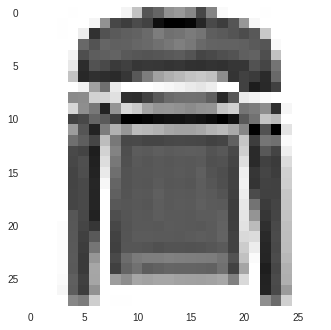

In [23]:
# See input data dimensions
train_sample = 5
print("Image size: {}".format(train_img[train_sample].shape))
print("Label: {}".format(train_lbl[train_sample]))
print("This is a {}".format(classes[train_lbl[train_sample]]))
print("Total labels: {}".format(np.unique(train_lbl)))
plt.imshow(train_img[train_sample])
plt.grid(False)
plt.show()


In [0]:
# reshape and normalize set
train_img = train_img.reshape(60000, 28, 28, 1)/255.0
test_img = test_img.reshape(10000, 28, 28, 1)/255.0

In [0]:
model = keras.models.Sequential([keras.layers.Conv2D(1, (3,3), activation=tf.nn.relu, input_shape = (28, 28, 1)),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(100, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation=tf.nn.softmax) ])


In [26]:
# Print network
model.summary()

# Compile network: define optimizer, loss and display metrics
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 169)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               17000     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 18,020
Trainable params: 18,020
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train
t1 = time.monotonic()
model.fit(train_img, train_lbl, epochs = 2)
t2 = time.monotonic()
print("Training time: {}".format(t2-t1))

Epoch 1/2
60000/60000 [==============================] - 18s 296us/sample - loss: 0.3872 - acc: 0.8599
Epoch 2/2
60000/60000 [==============================] - 18s 299us/sample - loss: 0.3608 - acc: 0.8700
Training time: 35.679117108000355


In [33]:
# Evaluate
print("Test set results")
test_params = model.evaluate(test_img, test_lbl)
print(test_params)

Test set results
10000/10000 [==============================] - 1s 147us/sample - loss: 0.3925 - acc: 0.8610
[0.3925238687753677, 0.861]


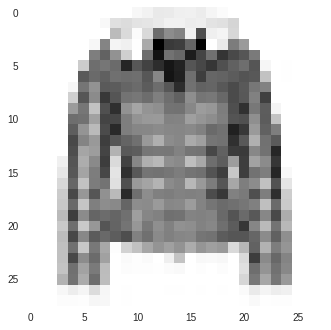

Prediction: coat with 1.000% confidence, 
Ground Truth: coat


In [50]:
# Predict a single image
test_img_index = 1050
img = test_img[test_img_index].reshape(28,28)*255
plt.imshow(img)
plt.grid(False)
plt.show()


img = img.reshape(1,28,28,1)   # we need to reshape it for the network
output = model.predict(img)[0]
predicted_class = np.where(output == max(output))[0][0]
print("Prediction: {} with {:.3f}% confidence, \nGround Truth: {}".format(classes[predicted_class],output[predicted_class], classes[test_lbl[test_img_index]]))